<a href="https://colab.research.google.com/github/karthikaG-GK/Chronic-Kidney-Disease-Prediction-hands-on-AWS/blob/master/nextlabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1:**

In [113]:
text = {"orders":
 [{"id":1},
  {"id":2},
  {"id":3},
  {"id":4},
  {"id":5},
  {"id":6},
  {"id":7},
  {"id":8},
  {"id":9},
  {"id":10},
  {"id":11},
  {"id":648},
  {"id":649},
  {"id":650},
  {"id":651},
  {"id":652},
  {"id":653}],
 "errors":
 [{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}

# Answer
[list(j.values())[0] for i in text for j in text[i]]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 648, 649, 650, 651, 652, 653, 3]

# **Question 2:**

## **Importing data set**

In [ ]:
url="https://drive.google.com/file/d/1Xzvw-z_glMcOYxJPJ4SckuKrVOulUuzO/view"

In [116]:
import pandas as pd
df= pd.read_csv(url,index_col=[0])
df.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  **Data Exploration**`

In [117]:
df.shape

(82580, 29)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82580 entries, 0 to 82579
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82580 non-null  int64  
 1   Nationality           82580 non-null  object 
 2   Age                   78834 non-null  float64
 3   DaysSinceCreation     82580 non-null  int64  
 4   AverageLeadTime       82580 non-null  int64  
 5   LodgingRevenue        82580 non-null  float64
 6   OtherRevenue          82580 non-null  float64
 7   BookingsCanceled      82580 non-null  int64  
 8   BookingsNoShowed      82580 non-null  int64  
 9   BookingsCheckedIn     82580 non-null  int64  
 10  PersonsNights         82580 non-null  int64  
 11  RoomNights            82580 non-null  int64  
 12  DaysSinceLastStay     82580 non-null  int64  
 13  DaysSinceFirstStay    82580 non-null  int64  
 14  DistributionChannel   82580 non-null  object 
 15  MarketSegment      

From the above result we can get an idea of our data.It shows that, 3rd,15th,16th columns are ctegorical. We can obvserve, **Age** column containing null values. <br> Before imputation we shall remove duplicates in our dataset

### **Removing Duplicate values**

In [118]:
df.drop_duplicates(inplace=True)
df.shape

(82580, 29)

Before and after removing duplicates the shape remians as same. We can observe that our dataset dosen't contains duplicates

### **Visulaizing missing values**

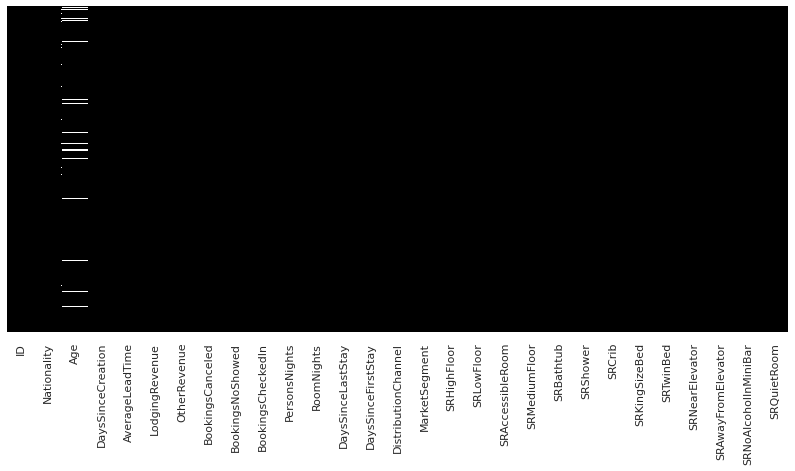

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(),yticklabels= False, cbar= False, cmap= 'binary_r' )

Only one column **Age** contains null values. And the null value count is also very less. WE can remove the records which contains null values

### **Handling missing values**

In [76]:
df.dropna(inplace=True)

In [77]:
missing_data=df.isnull().sum().to_frame()
missing_data=missing_data.rename(columns={0:"Missing values"})
missing_data

,Missing values
ID,0
Nationality,0
Age,0
DaysSinceCreation,0
AverageLeadTime,0
LodgingRevenue,0
OtherRevenue,0
BookingsCanceled,0
BookingsNoShowed,0
BookingsCheckedIn,0


In the above result we can see that, our dataset doesn't contains any missing values.<br> 

### Finding Correlation between variables

In [78]:
corr_mat = df.corr().abs()
corr_mat

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,1.000000,0.128368,0.986776,0.146148,0.099166,0.163090,0.016796,0.011906,0.279482,0.252845,...,0.005862,0.006843,0.004156,0.038162,0.022227,0.019185,0.000655,0.010846,0.012300,0.047437
Age,0.128368,1.000000,0.125970,0.251712,0.051373,0.116581,0.004446,0.006721,0.130474,0.110803,...,0.007169,0.017266,0.010652,0.117421,0.003077,0.013670,0.012988,0.009559,0.010679,0.014094
DaysSinceCreation,0.986776,0.125970,1.000000,0.134294,0.090162,0.157007,0.016700,0.012102,0.272285,0.243975,...,0.006484,0.009585,0.005274,0.035947,0.025467,0.022719,0.001697,0.011394,0.011354,0.049042
AverageLeadTime,0.146148,0.251712,0.134294,1.000000,0.217474,0.242221,0.014656,0.011521,0.243048,0.350210,...,0.000850,0.007210,0.008272,0.040311,0.017878,0.078178,0.000143,0.000295,0.006525,0.007338
LodgingRevenue,0.099166,0.051373,0.090162,0.217474,1.000000,0.537068,0.063528,0.060418,0.406006,0.655173,...,0.005677,0.003203,0.012062,0.017372,0.009343,0.006604,0.004302,0.011950,0.001103,0.052833
OtherRevenue,0.163090,0.116581,0.157007,0.242221,0.537068,1.000000,0.044486,0.033859,0.302791,0.536998,...,0.007840,0.007853,0.011885,0.001678,0.011037,0.012283,0.001084,0.012175,0.005068,0.016855
BookingsCanceled,0.016796,0.004446,0.016700,0.014656,0.063528,0.044486,1.000000,0.328430,0.471273,0.087482,...,0.024849,0.001511,0.001194,0.003221,0.018618,0.008244,0.000501,0.004680,0.000317,0.005543
BookingsNoShowed,0.011906,0.006721,0.012102,0.011521,0.060418,0.033859,0.328430,1.000000,0.289987,0.064727,...,0.000611,0.001101,0.000870,0.002346,0.012653,0.002042,0.000365,0.001234,0.000231,0.003362
BookingsCheckedIn,0.279482,0.130474,0.272285,0.243048,0.406006,0.302791,0.471273,0.289987,1.000000,0.486931,...,0.011230,0.005422,0.000054,0.035915,0.008983,0.026779,0.001117,0.009461,0.004832,0.008989
PersonsNights,0.252845,0.110803,0.243975,0.350210,0.655173,0.536998,0.087482,0.064727,0.486931,1.000000,...,0.005930,0.016028,0.013918,0.011391,0.036495,0.000737,0.000633,0.014605,0.002255,0.031166


In [79]:
import numpy as np

up_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
up_tri

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,NaN,0.128368,0.986776,0.146148,0.099166,0.163090,0.016796,0.011906,0.279482,0.252845,...,0.005862,0.006843,0.004156,0.038162,0.022227,0.019185,0.000655,0.010846,0.012300,0.047437
Age,NaN,NaN,0.125970,0.251712,0.051373,0.116581,0.004446,0.006721,0.130474,0.110803,...,0.007169,0.017266,0.010652,0.117421,0.003077,0.013670,0.012988,0.009559,0.010679,0.014094
DaysSinceCreation,NaN,NaN,NaN,0.134294,0.090162,0.157007,0.016700,0.012102,0.272285,0.243975,...,0.006484,0.009585,0.005274,0.035947,0.025467,0.022719,0.001697,0.011394,0.011354,0.049042
AverageLeadTime,NaN,NaN,NaN,NaN,0.217474,0.242221,0.014656,0.011521,0.243048,0.350210,...,0.000850,0.007210,0.008272,0.040311,0.017878,0.078178,0.000143,0.000295,0.006525,0.007338
LodgingRevenue,NaN,NaN,NaN,NaN,NaN,0.537068,0.063528,0.060418,0.406006,0.655173,...,0.005677,0.003203,0.012062,0.017372,0.009343,0.006604,0.004302,0.011950,0.001103,0.052833
OtherRevenue,NaN,NaN,NaN,NaN,NaN,NaN,0.044486,0.033859,0.302791,0.536998,...,0.007840,0.007853,0.011885,0.001678,0.011037,0.012283,0.001084,0.012175,0.005068,0.016855
BookingsCanceled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.328430,0.471273,0.087482,...,0.024849,0.001511,0.001194,0.003221,0.018618,0.008244,0.000501,0.004680,0.000317,0.005543
BookingsNoShowed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.289987,0.064727,...,0.000611,0.001101,0.000870,0.002346,0.012653,0.002042,0.000365,0.001234,0.000231,0.003362
BookingsCheckedIn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.486931,...,0.011230,0.005422,0.000054,0.035915,0.008983,0.026779,0.001117,0.009461,0.004832,0.008989
PersonsNights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005930,0.016028,0.013918,0.011391,0.036495,0.000737,0.000633,0.014605,0.002255,0.031166


In [80]:
to_drop = [col for col in up_tri.columns if any (up_tri[col]>0.9)]
to_drop

['DaysSinceCreation', 'DaysSinceLastStay', 'DaysSinceFirstStay']

In [81]:
df.drop(df[to_drop], axis=1,inplace=True)

In [82]:
df.shape

(78834, 26)

In [83]:
df.nunique()

ID                      78834
Nationality               188
Age                       105
AverageLeadTime           417
LodgingRevenue           9913
OtherRevenue             4373
BookingsCanceled            6
BookingsNoShowed            4
BookingsCheckedIn          28
PersonsNights              54
RoomNights                 45
DistributionChannel         4
MarketSegment               7
SRHighFloor                 2
SRLowFloor                  2
SRAccessibleRoom            2
SRMediumFloor               2
SRBathtub                   2
SRShower                    2
SRCrib                      2
SRKingSizeBed               2
SRTwinBed                   2
SRNearElevator              2
SRAwayFromElevator          2
SRNoAlcoholInMiniBar        2
SRQuietRoom                 2
dtype: int64

### **Analysing Nationality Column**

Here **Nationality** column is categorical. And there are 188 differnet nationalities. Before doing encoding we shall create a category for nationalities which having less occurence in dataset

In [84]:
nation = df['Nationality'].value_counts()
nation

FRA    12307
DEU    10164
GBR     8610
PRT     7638
ESP     4863
       ...  
GNQ        1
GIN        1
SWZ        1
SOM        1
NPL        1
Name: Nationality, Length: 188, dtype: int64

In [85]:
nation_lessfreq = nation[nation<1000]
nation_lessfreq

ISR    896
CHN    873
NOR    790
POL    755
AUS    722
      ... 
GNQ      1
GIN      1
SWZ      1
SOM      1
NPL      1
Name: Nationality, Length: 173, dtype: int64

In [86]:
def handle_loc(val):
    if (val in nation_lessfreq):
        return "others"
    else:
        return val
df['Nationality'] = df['Nationality'].apply(handle_loc)
Nation=df.Nationality.value_counts()
Nation

FRA       12307
others    11740
DEU       10164
GBR        8610
PRT        7638
ESP        4863
USA        3398
ITA        3301
BEL        3111
BRA        2710
NLD        2698
CHE        2081
IRL        1991
CAN        1514
AUT        1487
SWE        1221
Name: Nationality, dtype: int64

<BarContainer object of 16 artists>

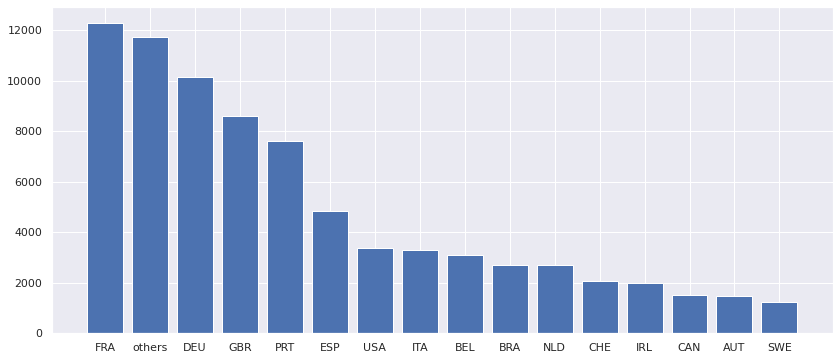

In [119]:
plt.figure(figsize=(14,6))
plt.bar(Nation.index,Nation.values)

France(FRA) people are the top visited people fot the particular Hotel. 2nd top visited people belongs to Germany(DEU)

### **Analysing Age column**

In [88]:
df['Age'].describe()

count    78834.000000
mean        45.468554
std         16.526276
min        -11.000000
25%         34.000000
50%         46.000000
75%         57.000000
max        122.000000
Name: Age, dtype: float64

From the above descriptive statistics results we can tell, People's Mean Age who are checking in the hotel is 45. <br> And 50% of the people's Age who visiting the hotel is above 46

### **Analysing AverageLeadTIme, Lodging Revenue, OthersRevenue**

In [89]:
df[['AverageLeadTime','LodgingRevenue','OtherRevenue']].describe()

,AverageLeadTime,LodgingRevenue,OtherRevenue
count,78834.000000,78834.000000,78834.000000
mean,67.171766,303.826430,68.250650
std,88.159066,368.427814,112.780841
min,-1.000000,0.000000,0.000000
25%,0.000000,69.000000,2.000000
50%,31.000000,237.600000,40.500000
75%,104.000000,409.000000,89.000000
max,588.000000,9682.400000,7730.250000


Here we can clearly say that.. these numerical columns are not normaly distributed. They are skewed. 

In [90]:
import warnings
warnings.filterwarnings('ignore')

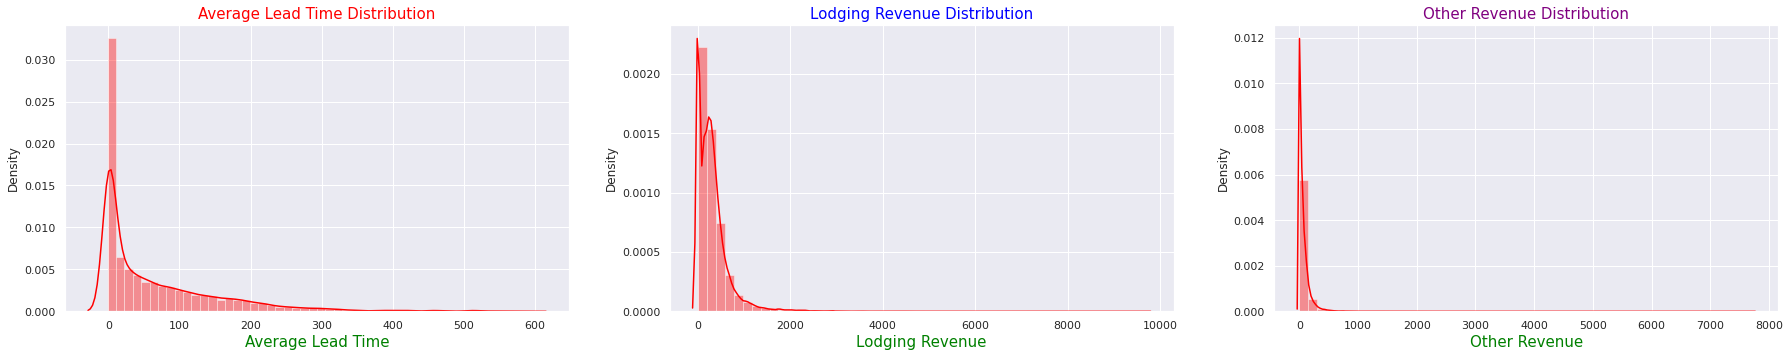

In [91]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(30.7,5.27)})


plt.subplot(1, 3, 1)
g=sns.distplot(df.AverageLeadTime	,color="Red")
g.set_xlabel("Average Lead Time",size=15,color="green")
g.set_title("Average Lead Time Distribution",size=15,color="red")


plt.subplot(1,3,2)
g=sns.distplot(df.LodgingRevenue	,color="Red")
g.set_xlabel("Lodging Revenue",size=15,color="green")
g.set_title("Lodging Revenue Distribution",size=15,color="blue")


plt.subplot(1,3,3)
g=sns.distplot(df.OtherRevenue	,color="Red")
g.set_xlabel("Other Revenue",size=15,color="green")
g.set_title("Other Revenue Distribution",size=15,color="purple")

plt.show()

From the above diagram we can observe that all the three columns are positive skewed. We need to do normalization <br> Let's see other skewed columns

In [92]:
to_norm = df.skew().sort_values(ascending=False)
to_norm

SRNoAlcoholInMiniBar    88.773307
SRAccessibleRoom        64.391893
BookingsCanceled        61.627399
BookingsNoShowed        58.105212
SRNearElevator          56.129139
SRMediumFloor           33.514827
BookingsCheckedIn       27.750087
SRLowFloor              26.012125
SRShower                23.498762
SRBathtub               18.555386
SRAwayFromElevator      16.541601
OtherRevenue            10.299075
SRCrib                   8.615595
RoomNights               5.754604
LodgingRevenue           4.585090
SRHighFloor              4.211577
SRQuietRoom              2.852721
SRTwinBed                2.031987
PersonsNights            1.902704
AverageLeadTime          1.895927
SRKingSizeBed            0.599931
ID                      -0.018332
Age                     -0.156066
dtype: float64

From the above result we can conclude that **SRNoAlcoholInMiniBar** column is highly skewd. <br> Let's perform normalization.

**Spliting Dependent and Independent variables**

In [93]:
y= df[["ID"]]
x=df.drop(["ID"],axis=1)
x

,Nationality,Age,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,45,371.00,105.3,1,0,3,8,5,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,0,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,93,240.00,60.0,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,0,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,others,54.0,58,230.00,24.0,0,0,1,4,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82574,PRT,41.0,7,75.18,7.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
82575,SWE,51.0,114,190.08,6.0,0,0,1,6,3,...,0,0,0,0,1,0,0,0,0,0
82576,SWE,50.0,0,0.00,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
82577,DEU,50.0,18,222.00,255.0,0,0,1,3,3,...,0,0,0,0,0,0,0,0,0,0


## **Categorical Encoding**

Seperating numerical and categorical columns

In [94]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categ= ['object']
num= x.select_dtypes(include=numerics)
cat = x.select_dtypes(include=categ)

In [95]:
newdf=pd.get_dummies(x,columns=cat.columns)
newdf.shape

(78834, 49)

## **Feature Scaling**

###**Before Scaling** 

In [96]:
newdf.describe()

,Age,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,SRHighFloor,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
count,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,...,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000
mean,45.468554,67.171766,303.826430,68.250650,0.001865,0.000584,0.796649,4.717140,2.387181,0.048342,...,0.140904,0.006241,0.823870,0.002816,0.005011,0.023873,0.136477,0.112401,0.579065,0.140358
std,16.526276,88.159066,368.427814,112.780841,0.066319,0.028487,0.691549,4.581843,2.195802,0.214489,...,0.347924,0.078753,0.380933,0.052992,0.070608,0.152654,0.343296,0.315861,0.493712,0.347361
min,-11.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,69.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,31.000000,237.600000,40.500000,0.000000,0.000000,1.000000,4.000000,2.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,57.000000,104.000000,409.000000,89.000000,0.000000,0.000000,1.000000,8.000000,4.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,122.000000,588.000000,9682.400000,7730.250000,9.000000,3.000000,66.000000,116.000000,116.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
from sklearn.preprocessing import MinMaxScaler
def scaling(data):
  scaler = MinMaxScaler()
  model = scaler.fit(data)
  data = model.transform(data)
  return data
data=pd.DataFrame(scaling(newdf))

###**After Scaling**

In [122]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
count,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,...,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000
mean,0.424576,0.115742,0.031379,0.008829,0.000207,0.000195,0.012070,0.040665,0.020579,0.048342,...,0.140904,0.006241,0.823870,0.002816,0.005011,0.023873,0.136477,0.112401,0.579065,0.140358
std,0.124258,0.149676,0.038051,0.014590,0.007369,0.009496,0.010478,0.039499,0.018929,0.214489,...,0.347924,0.078753,0.380933,0.052992,0.070608,0.152654,0.343296,0.315861,0.493712,0.347361
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.338346,0.001698,0.007126,0.000259,0.000000,0.000000,0.015152,0.008621,0.008621,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.428571,0.054329,0.024539,0.005239,0.000000,0.000000,0.015152,0.034483,0.017241,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.511278,0.178268,0.042242,0.011513,0.000000,0.000000,0.015152,0.068966,0.034483,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Dimension Reduction**

In [123]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 49)
X = pca.fit_transform(data)
explained_ratio= pca.explained_variance_ratio_
np.cumsum(explained_ratio)

array([0.20961872, 0.32860693, 0.40932848, 0.47513246, 0.53441423,
       0.58722123, 0.63626251, 0.68056216, 0.71821557, 0.7506956 ,
       0.78152287, 0.80647041, 0.82897215, 0.84798916, 0.86590938,
       0.88285523, 0.8982948 , 0.91277847, 0.92467539, 0.93553111,
       0.94481618, 0.95346718, 0.96153224, 0.96827151, 0.97418353,
       0.98000553, 0.98482473, 0.98823498, 0.99115002, 0.99283944,
       0.99434228, 0.99555306, 0.9966055 , 0.99757235, 0.99833134,
       0.99895158, 0.99932459, 0.99953799, 0.99967861, 0.99977366,
       0.99983353, 0.99988816, 0.99994162, 0.99997048, 0.99998861,
       1.        , 1.        , 1.        , 1.        ])

99% of data is explained by just 27 variables. So we take only first 27 variables.

In [124]:
data = data.iloc[:,:28]
data.shape

(78834, 28)

##**Model Bulding**

In [101]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(data, y)

RandomForestRegressor(n_estimators=1000, random_state=42)

##**Model Testing**

### **Importing Test Data**

In [107]:
url="https://drive.google.com/file/d/1Xzvw-z_glMcOYxJPJ4SckuKrVOulUuzO/view"

Saving test_data_evaluation_part2.csv to test_data_evaluation_part2 (2).csv


In [108]:
import pandas as pd
test= pd.read_csv(url,index_col=[0])
test.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [125]:
test.shape

(967, 26)

### **Preprocessing Test Data**

In [109]:
test.drop_duplicates(inplace=True)
test.dropna(inplace=True)
test.drop(test[to_drop], axis=1,inplace=True)
y= test[["ID"]]
x=test.drop(["ID"],axis=1)
x['Nationality'].apply(handle_loc)
testdf=pd.get_dummies(x,columns=cat.columns)
testD=pd.DataFrame(scaling(testdf))
testD = testD.iloc[:,:28]
testD.shape

(967, 28)

### **Predicting Test Data**

In [110]:
pred = np.round(rf.predict(testD))
pred

array([55804., 37390., 56159., 63620., 28760., 34931., 35296., 14835.,
       67654., 32387., 59273., 32053., 60258., 59234., 30827., 32015.,
       34976., 55879.,  5858., 37395., 29525., 67654., 31178., 61595.,
       24245., 59038., 36126., 62095., 19965., 23275., 45560., 37814.,
       20804., 39856., 62438., 11999., 32099., 31568., 28507., 26369.,
       28859., 28447., 22584., 56796., 29145., 27348., 16076., 29145.,
       31265., 37727., 67606., 31619., 47270., 34735., 47270., 56387.,
       38938., 58079., 53331., 28894., 52896., 54662., 60850., 23867.,
       61297., 26495., 28644., 31035., 41431., 26615., 57037., 44185.,
       26171., 57907., 57326., 26284., 26192., 59889., 59889., 42104.,
       38580., 56780., 41839., 59582., 43361., 42583., 19343.,  8231.,
       58479., 23438.,  7774., 57593., 55024., 29979., 59669., 28409.,
       44461., 56933., 50080., 65932., 20340., 32223., 63519., 47169.,
       61150., 26462., 38544., 34771., 56387., 30418., 63438., 15440.,
      

### **Metrics**

In [112]:
from sklearn.metrics import precision_score,accuracy_score,recall_score
pr=precision_score(y,pred,average='weighted')
ac=accuracy_score(y,pred)
rc=recall_score(y,pred,average='weighted')
print("Prcision {} Recall {} Accuracy {}".format(pr,rc,ac))

Prcision 0.0 Recall 0.0 Accuracy 0.0
